# Data Analysis with Python

Cassandra can't make aggregations and some filtering conditions, so I used Python with Pandas, Matplotlib, and Scikit Learn for more complex queries and a chance to get some visualizations in the analysis.

In [1]:
from cassandra.cluster import Cluster
import pandas as pd

# Connect to Cassandra
cluster = Cluster(['34.74.214.149'])
session = cluster.connect('contratos_keyspace')

# Execute the query
query = "SELECT * FROM contratos_table_full"

result = session.execute(query)

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=result.column_names)


In [2]:
# Apply the logic from your SQL query using Pandas
df['percentage_discrepancy'] = (
    (df['valorfinalcompra'] - df['valorinicialcompra']) / df['valorinicialcompra'] * 100
).where(df['valorinicialcompra'] > 0)

# Calculate the average percentage discrepancy
average_percentage_discrepancy = round(df['percentage_discrepancy'].mean(), 2)

# Display the result
print("Average Percentage Discrepancy:", average_percentage_discrepancy)

# Close the Cassandra connection
cluster.shutdown()

Average Percentage Discrepancy: 11427.85


### Bar chart

This code filters the DataFrame to extract rows with the specified ID and then creates a bar chart using matplotlib. The x-axis represents the 'id,' and the y-axis shows the values of 'valorinicialcompra' and 'valorfinalcompra' for the given ID. The resulting bar chart visually compares these two values for the specific ID, aiding in the analysis of their relationship. Labels and titles are added for clarity.

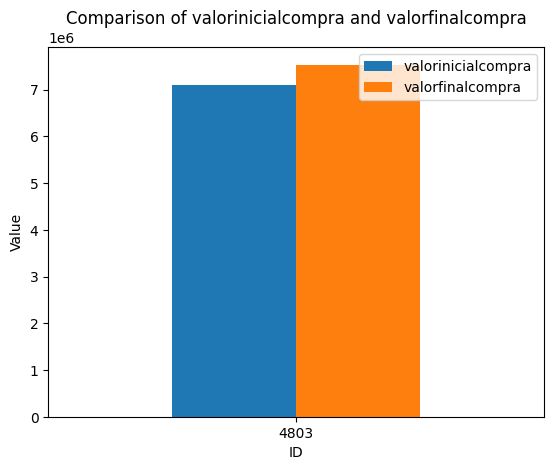

In [5]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the specific ID
df_id = df[df['id'] == 118003613]

# Check if df_id is empty
if not df_id.empty:
    # Plot the bar chart
    fig, ax = plt.subplots()

    # Using the 'id' as the x-axis and 'valorinicialcompra' and 'valorfinalcompra' as the y-axis
    df_id[['valorinicialcompra', 'valorfinalcompra']].plot(kind='bar', ax=ax, rot=0)

    # Set labels and title
    plt.xlabel('ID')
    plt.ylabel('Value')
    plt.title('Comparison of valorinicialcompra and valorfinalcompra')

    plt.show()
else:
    print("No data found")


### Scatter plot

This code performs K-Means clustering on the 'valorinicialcompra' column of a DataFrame. It standardizes the data, applies K-Means with a specified number of clusters, and creates a scatter plot with data points colored by their cluster assignments. The plot visualizes patterns or groups within 'valorinicialcompra', aiding in data exploration and analysis. Adjust the 'num_clusters' parameter to explore different clustering configurations.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


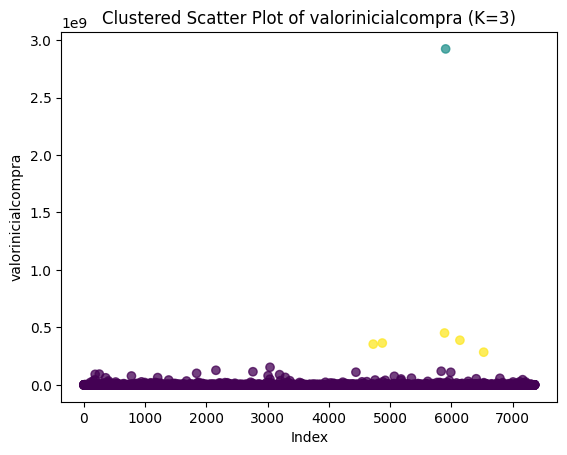

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the correct column names
data = df[['valorinicialcompra']]  # Change to lowercase

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-Means clustering
num_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster_valorinicialcompra'] = kmeans.fit_predict(scaled_data)

# Scatter plot
plt.scatter(df.index, df['valorinicialcompra'], c=df['cluster_valorinicialcompra'], cmap='viridis', alpha=0.75)
plt.xlabel('Index')
plt.ylabel('valorinicialcompra')
plt.title(f'Clustered Scatter Plot of valorinicialcompra (K={num_clusters})')
plt.show()
